## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking the number of mice.
list_length = len(combined_study_data)
list_length

1893

In [3]:
#checking how many unique test subjects there are
mouse_id_number = len(combined_study_data["Mouse ID"].unique())
mouse_id_number

249

In [4]:
#listing unqiue mouse ID names 
mouse_id_unique = combined_study_data["Mouse ID"].unique()
mouse_id_unique

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [5]:
#make a clean table with only mouse id and timepoint
mouse_time =combined_study_data.drop(columns=['Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'])
mouse_time

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
#display only duplicate mouse IDs by keeping the last 
mouse_duplicate = mouse_time[mouse_time.duplicated(keep='last')]
mouse_duplicate

,Mouse ID,Timepoint
908,g989,0
910,g989,5
912,g989,10
914,g989,15
916,g989,20


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#finding which mouse has duplicate data
mouse_duplicate_all = combined_study_data[combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep = 'last')]
mouse_duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#want to drop entire mouse duplicate set because you don't know which data test set is the accurate one to drop

clean_study_data= combined_study_data.drop(combined_study_data.index[combined_study_data['Mouse ID'] == 'g989'], inplace = False)
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_id_clean = len(clean_study_data["Mouse ID"].unique())
mouse_id_clean

248

## Summary Statistics

In [10]:
#create the groupby but don't try to display as any type of data frame yet or summary stats will be wrong
regimen_groups = clean_study_data.groupby(['Drug Regimen'])
regimen_groups




In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = regimen_groups["Tumor Volume (mm3)"].mean()
tv_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tv_median = regimen_groups["Tumor Volume (mm3)"].median()
tv_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tv_variance = regimen_groups["Tumor Volume (mm3)"].var()
tv_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tv_std= regimen_groups["Tumor Volume (mm3)"].std()
tv_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tv_sem= regimen_groups["Tumor Volume (mm3)"].sem()
tv_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
regimen_list = regimen_groups['Drug Regimen'].unique() 
regimen_list

Drug Regimen
Capomulin    [Capomulin]
Ceftamin      [Ceftamin]
Infubinol    [Infubinol]
Ketapril      [Ketapril]
Naftisol      [Naftisol]
Placebo        [Placebo]
Propriva      [Propriva]
Ramicane      [Ramicane]
Stelasyn      [Stelasyn]
Zoniferol    [Zoniferol]
Name: Drug Regimen, dtype: object

In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#variance is measured in the data unit squared (mm3^2)
Regimen_stats = pd.DataFrame({"Mean Tumor Vol (mm3)" : tv_mean,
                             "Median Tumor Vol (mm3)" : tv_median,
                             "Tumor Vol Variance (mm3^2)" : tv_variance,
                             "Tumor Vol Standard Dev (mm3)" : tv_std,
                             "Tumor Vol SEM (mm3)" : tv_sem})

Regimen_stats

,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Tumor Vol Variance (mm3^2),Tumor Vol Standard Dev (mm3),Tumor Vol SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_groups.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [19]:

#use .count to see how many times each regimen appears in the grouped data set 
regimen_count = regimen_groups.count()

#add index to turn drug regimen into a column that can be called for the x axis 
regimen_count.reset_index(level=0, inplace=True)
regimen_count.rename(columns = {"Age_months" :  "Total Measurements"}, inplace = True)
regimen_count

,Drug Regimen,Mouse ID,Sex,Total Measurements,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#filter data fram down to onyl two columns to chart 
regimen_measure = regimen_count[["Drug Regimen", "Total Measurements"]]

#set index to drug regimen to use as labels 
regimen_index = regimen_measure.set_index("Drug Regimen")

regimen_index

,Total Measurements
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


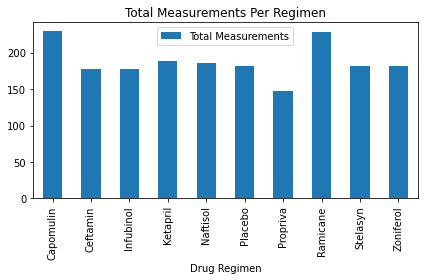

In [27]:
#use dataframe.plot to create bar chart in pandas

regimen_index.plot(kind = "bar")
plt.title("Total Measurements Per Regimen")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#set x axis and tick locations
x_axis = regimen_count["Drug Regimen"]
tick_locations = [value for value in x_axis] 

plt.bar(x_axis, regimen_count["Mouse ID"],color = 'b', alpha = 0.5, align = "center")
#set tick locations
plt.xticks(tick_locations, rotation = "vertical")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
print(max_time)

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_volume = pd.merge(max_time, clean_study_data, on=['Mouse ID', 'Timepoint'])
last_volume

In [ ]:
#can't use a .loc function off the bat bc we don't have an index
#want to pass in and array of values and then reference it with a loc

Capomulin = last_volume.loc[last_volume["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
Capomulin

In [ ]:
Ramicane = last_volume.loc[last_volume["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
Ramicane

In [ ]:
Infubinol = last_volume.loc[last_volume["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
Infubinol

In [ ]:
Ceftamin = last_volume.loc[last_volume["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
Ceftamin

In [ ]:
treatment_series = [Capomulin,
              Ramicane,
              Ceftamin,
              Infubinol]
treatment_series

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for s in treatment_series:
    quartiles = s.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The IQR of the data is{iqr}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # add subset 
    print(f"Values below {lower_bound} may be outliers")
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
#write observations/insights about data
#use markdown method or see read me